In [2]:
import pandas as pd
import seaborn as sns
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, fbeta_score, classification_report

In [3]:
ad=pd.read_csv("Social_Network_Ads.csv")
ad.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [4]:
ad.shape

(400, 5)

In [5]:
ad.isnull().any()

User ID            False
Gender             False
Age                False
EstimatedSalary    False
Purchased          False
dtype: bool

<AxesSubplot:xlabel='Gender', ylabel='EstimatedSalary'>

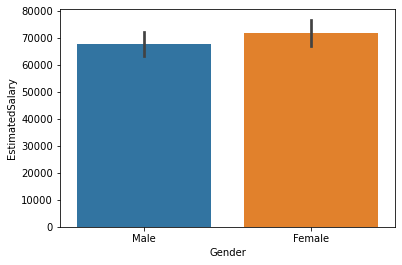

In [6]:
sns.barplot(x='Gender',y='EstimatedSalary',data=ad)

<AxesSubplot:xlabel='Gender', ylabel='EstimatedSalary'>

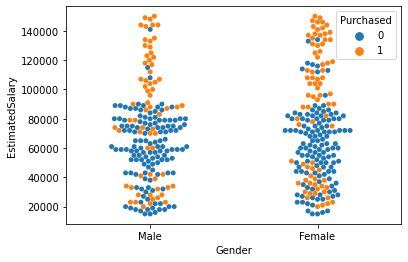

In [7]:
sns.swarmplot(x='Gender',y='EstimatedSalary',hue='Purchased',data=ad)

<AxesSubplot:xlabel='Gender', ylabel='EstimatedSalary'>

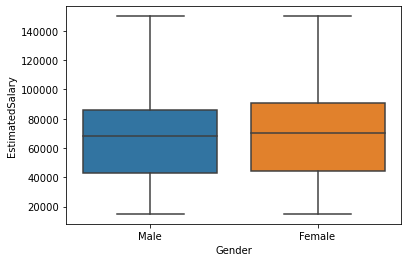

In [8]:
sns.boxplot(x='Gender',y='EstimatedSalary',data=ad)

In [9]:
ad=pd.get_dummies(ad,columns=['Gender'])

In [10]:
ad.head()

,User ID,Age,EstimatedSalary,Purchased,Gender_Female,Gender_Male
0,15624510,19,19000,0,0,1
1,15810944,35,20000,0,0,1
2,15668575,26,43000,0,1,0
3,15603246,27,57000,0,1,0
4,15804002,19,76000,0,0,1


<AxesSubplot:xlabel='Purchased', ylabel='count'>

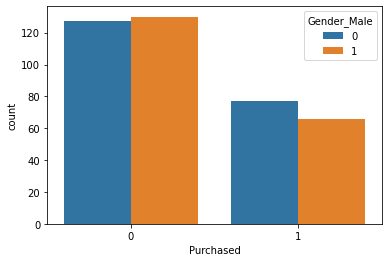

In [12]:
sns.countplot(data = ad , x='Purchased',hue="Gender_Male")

In [13]:
ad['Gender']=ad['Gender_Male']

In [14]:
ad.head()

,User ID,Age,EstimatedSalary,Purchased,Gender_Female,Gender_Male,Gender
0,15624510,19,19000,0,0,1,1
1,15810944,35,20000,0,0,1,1
2,15668575,26,43000,0,1,0,0
3,15603246,27,57000,0,1,0,0
4,15804002,19,76000,0,0,1,1


In [15]:
ad.drop('Gender_Male',axis=1,inplace=True)
ad.drop('Gender_Female', axis=1, inplace=True)

In [16]:
ad.head()

,User ID,Age,EstimatedSalary,Purchased,Gender
0,15624510,19,19000,0,1
1,15810944,35,20000,0,1
2,15668575,26,43000,0,0
3,15603246,27,57000,0,0
4,15804002,19,76000,0,1


In [17]:
ad.describe()

,User ID,Age,EstimatedSalary,Purchased,Gender
count,4.000000e+02,400.000000,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500,0.490000
std,7.165832e+04,10.482877,34096.960282,0.479864,0.500526
min,1.556669e+07,18.000000,15000.000000,0.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000,1.000000


C:\Users\Ahmed\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

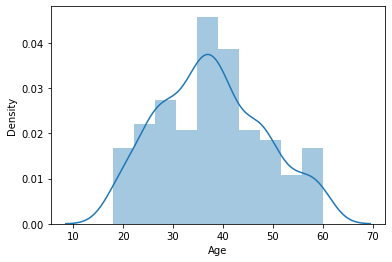

In [18]:
sns.distplot(ad["Age"])

C:\Users\Ahmed\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='EstimatedSalary', ylabel='Density'>

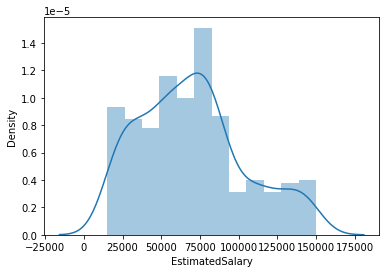

In [21]:
sns.distplot(ad["EstimatedSalary"])

<AxesSubplot:xlabel='EstimatedSalary', ylabel='Age'>

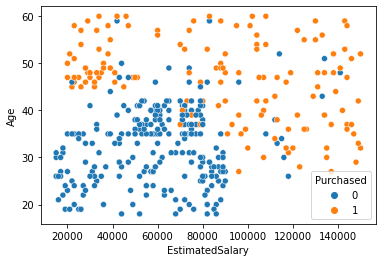

In [22]:
sns.scatterplot(data= ad, x="EstimatedSalary" , y="Age",hue="Purchased")

In [23]:
ad.drop('User ID',axis=1,inplace=True)

In [25]:
x=ad.drop("Purchased",axis =1)
y=ad['Purchased']

In [27]:
y.values_counts()

AttributeError: 'Series' object has no attribute 'values_counts'

In [28]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=46)

In [29]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [30]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train,y_train)

#getting confusion matrix
from sklearn.metrics import confusion_matrix
y_pred = lr.predict(x_test)
cm = confusion_matrix(y_test,y_pred)
print('confusion matrix:\n',cm)

#checking accuracy
from sklearn.metrics import accuracy_score
lra = accuracy_score(y_test,y_pred)
print('accuracy score = ',lra)

confusion matrix:
 [[54  4]
 [ 6 16]]
accuracy score =  0.875


In [31]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski',p = 2)
knn.fit(x_train,y_train)

#getting confusion matrix
from sklearn.metrics import confusion_matrix
y_pred = knn.predict(x_test)
cm = confusion_matrix(y_test,y_pred)
print('confusion matrix:\n',cm)

#checking accuracy
from sklearn.metrics import accuracy_score
knna = accuracy_score(y_test,y_pred)
print('accuracy score = ',accuracy_score(y_test,y_pred))

confusion matrix:
 [[54  4]
 [ 3 19]]
accuracy score =  0.9125


In [32]:
from sklearn.svm import SVC
svc = SVC(kernel = 'linear')
svc.fit(x_train,y_train)

#getting confusion matrix
from sklearn.metrics import confusion_matrix
y_pred = svc.predict(x_test)
cm = confusion_matrix(y_test,y_pred)
print('confusion matrix:\n',cm)

#checking accuracy
from sklearn.metrics import accuracy_score
sva =accuracy_score(y_test,y_pred)
print('accuracy score = ',accuracy_score(y_test,y_pred))

confusion matrix:
 [[54  4]
 [ 8 14]]
accuracy score =  0.85


In [33]:
from sklearn.svm import SVC
svc = SVC(kernel = 'rbf')
svc.fit(x_train,y_train)

#getting confusion matrix
from sklearn.metrics import confusion_matrix
y_pred = svc.predict(x_test)
cm = confusion_matrix(y_test,y_pred)
print('confusion matrix:\n',cm)

#checking accuracy
from sklearn.metrics import accuracy_score
sva2 = accuracy_score(y_test,y_pred)
print('accuracy score = ',accuracy_score(y_test,y_pred))

confusion matrix:
 [[52  6]
 [ 2 20]]
accuracy score =  0.9


In [34]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(criterion = 'entropy')
dt.fit(x_train,y_train)

#getting confusion matrix
from sklearn.metrics import confusion_matrix
y_pred = dt.predict(x_test)
cm = confusion_matrix(y_test,y_pred)
print('confusion matrix:\n',cm)

#checking accuracy
from sklearn.metrics import accuracy_score
dta = accuracy_score(y_test,y_pred)
print('accuracy score = ',accuracy_score(y_test,y_pred))

confusion matrix:
 [[50  8]
 [ 6 16]]
accuracy score =  0.825


In [35]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 10, criterion = 'entropy')
rf.fit(x_train,y_train)

#getting confusion matrix
from sklearn.metrics import confusion_matrix
y_pred = rf.predict(x_test)
cm = confusion_matrix(y_test,y_pred)
print('confusion matrix:\n',cm)

#checking accuracy
from sklearn.metrics import accuracy_score
rfa = accuracy_score(y_test,y_pred)
print('accuracy score = ',accuracy_score(y_test,y_pred))

confusion matrix:
 [[54  4]
 [ 4 18]]
accuracy score =  0.9


<BarContainer object of 6 artists>

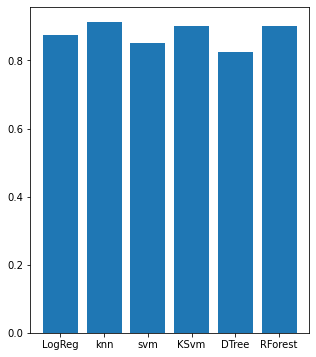

In [37]:
import matplotlib.pyplot as plt
plt.figure(figsize= (5,6))
ac = [lra,knna,sva,sva2,dta,rfa]
name = ['LogReg','knn','svm','KSvm','DTree', 'RForest']
plt.bar(name,ac)